In [1]:
import sys
sys.path.insert(0, "../../src/chung/")

import matplotlib.pyplot as plt

from utils import music_dataloader, IWSLT2017TransDataset

This is a notebook to demonstrate what a music dataset in the directory `src/chung/data/music` looks like.

## Music Datasets

Each music dataset contains sequences of notes to be played at each timestep, and instead of notes, they are preprocessed one-hot vector of notes. There are 88 possible notes in total, which corresponds to MIDI note numbers between 21 and 108 inclusive.

Music source: http://www-ens.iro.umontreal.ca/~boulanni/icml2012

#### Nottingham

Here, you can experiment with 'JSB', 'Muse', and 'Piano' instead of 'Nott' (for Nottingham) for other music datasets.

In [2]:
train, val, test = music_dataloader("Nott", prefix="../../src/chung/")

loading Nott data...


#### Nottingham Examples

Let's take the first sequence in the validation set.

In [3]:
val[0].shape

torch.Size([192, 88])

This corresponds to a music sequence of 192 timesteps. There are 88 possible notes, hence the second dimension is 88.

An example timestep looks like:

In [4]:
val[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

An example sequence looks like:

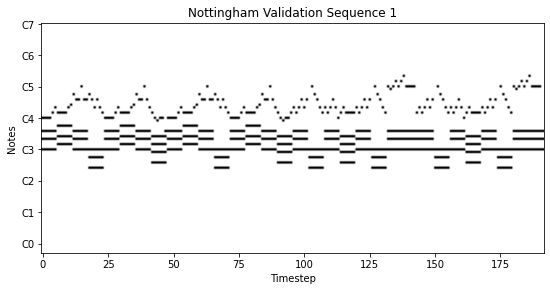

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(val[0].T, cmap='Greys', origin='lower')
y_label_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
ax.set_yticks([3, 15, 27, 39, 51, 63, 75, 87])
ax.set_yticklabels(y_label_list)
ax.set_ylabel('Notes')
ax.set_xlabel('Timestep')
ax.set_title("Nottingham Validation Sequence 1")
fig.savefig('../../src/chung/img/music_example.jpg', format='jpeg')

Second validation sequence looks like:

Text(0.5, 0, 'Timestep')

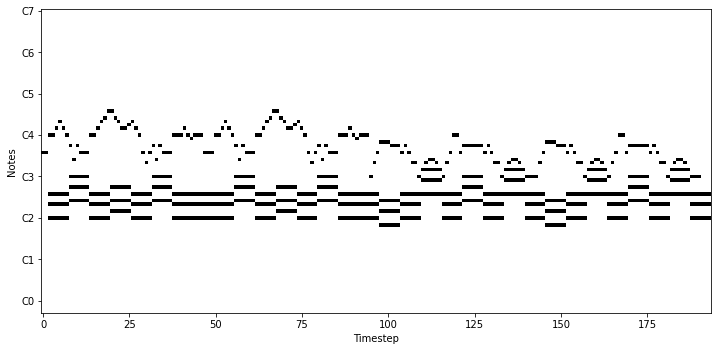

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(val[1].T, cmap='Greys', origin='lower')
y_label_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
ax.set_yticks([3, 15, 27, 39, 51, 63, 75, 87])
ax.set_yticklabels(y_label_list)
ax.set_ylabel('Notes')
ax.set_xlabel('Timestep')

In [7]:
print(f"Max train sequence length: {max(seq.shape[0] for seq in train)}")
print(f"Max val sequence length: {max(seq.shape[0] for seq in val)}")
print(f"Max test sequence length: {max(seq.shape[0] for seq in test)}")
print(f"Mean train sequence length: {sum(seq.shape[0] for seq in train) // train.shape[0]}")
print(f"Mean val sequence length: {sum(seq.shape[0] for seq in val) // train.shape[0]}")
print(f"Mean test sequence length: {sum(seq.shape[0] for seq in test) // train.shape[0]}")

Max train sequence length: 1788
Max val sequence length: 1473
Max test sequence length: 1793
Mean train sequence length: 254
Mean val sequence length: 65
Mean test sequence length: 64
